In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

AZ_reviews = pd.read_csv('AZ_review.csv')

In [2]:
AZ_reviews.columns

Index(['Unnamed: 0', 'business_id', 'cool', 'date', 'funny', 'review_id',
       'stars', 'text', 'useful', 'user_id'],
      dtype='object')

In [3]:
AZ_reviews['business_id'].describe()

count                    1877589
unique                     56495
top       JmI9nslLD7KZqRr__Bg6NQ
freq                        2390
Name: business_id, dtype: object

In [4]:
top_biz = "JmI9nslLD7KZqRr__Bg6NQ"
top_reviews = AZ_reviews[AZ_reviews['business_id'] == "JmI9nslLD7KZqRr__Bg6NQ"]
top_reviews_sorted = top_reviews.sort(columns='date')
top_reviews_sorted.head()['date']

/share/apps/python3/3.5.3/intel/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


345010    2006-06-25
345156    2006-08-07
344760    2006-08-13
344537    2006-08-30
344707    2006-09-03
Name: date, dtype: object

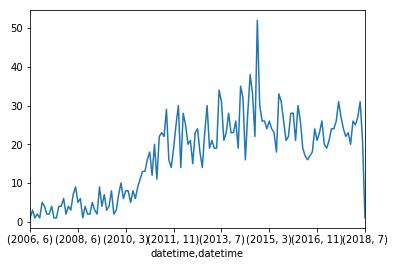

In [16]:
top_reviews_date = top_reviews.assign(datetime = pd.to_datetime(top_reviews_sorted['date'])).drop(labels=['date'], axis = 'columns')
groupbymonth = top_reviews_date.groupby([top_reviews_date['datetime'].dt.year,top_reviews_date['datetime'].dt.month]).count()['business_id'].plot()
plt.show()


In [17]:
def plot_by_month(df, business_id):
    reviews = df[df['business_id'] == business_id]
    reviews_sorted = reviews.sort(columns='date')
    reviews_datetime = reviews_sorted.assign(datetime = pd.to_datetime(reviews_sorted['date'])).drop(labels=['date'], axis = 'columns')
    group_by_month = reviews_datetime.groupby([reviews_datetime['datetime'].dt.year,reviews_datetime['datetime'].dt.month]).count()['business_id'].plot()
    plt.show()
    

/share/apps/python3/3.5.3/intel/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


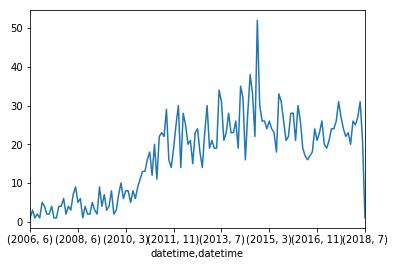

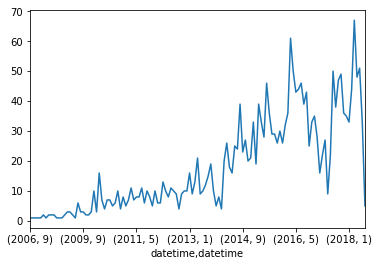

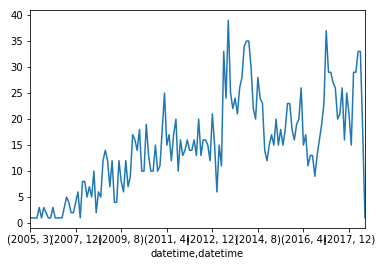

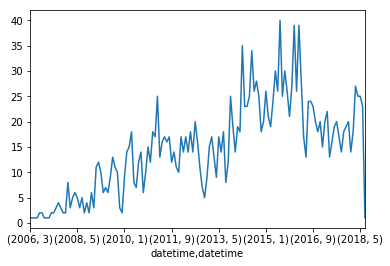

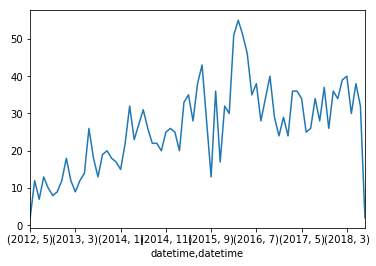

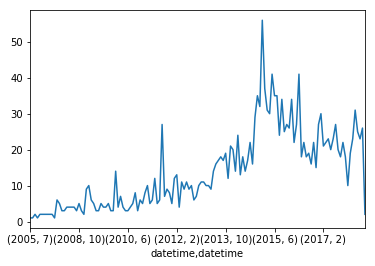

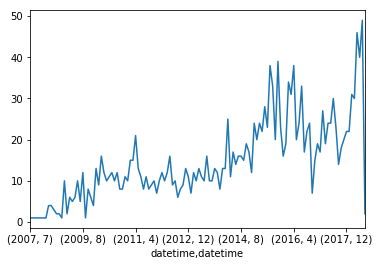

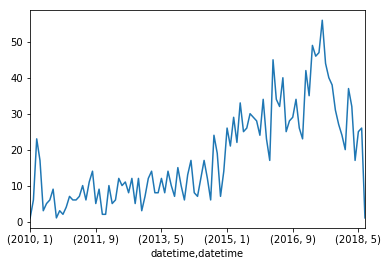

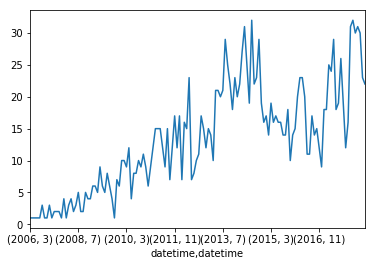

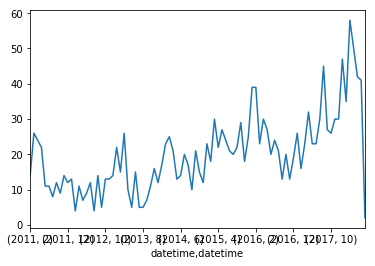

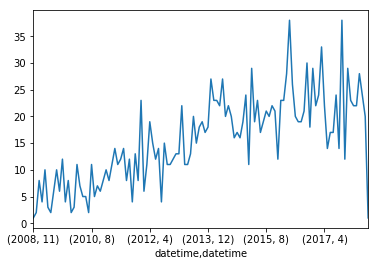

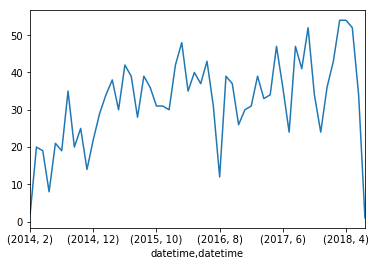

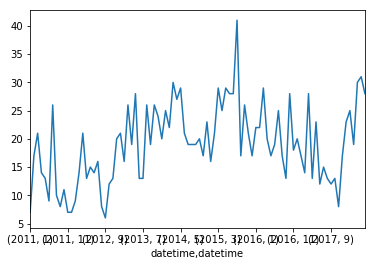

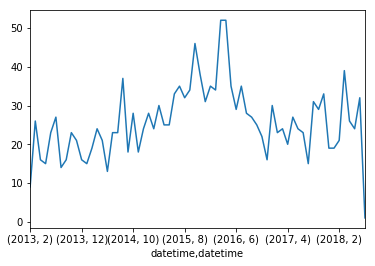

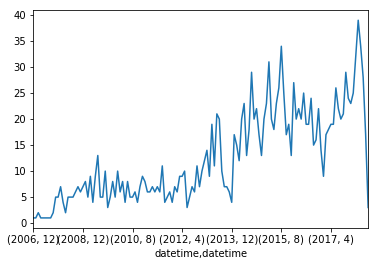

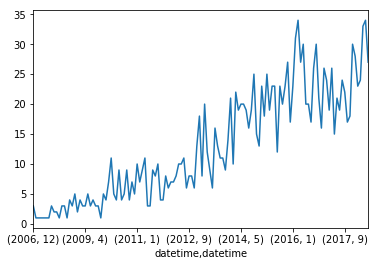

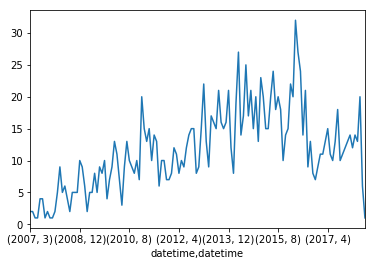

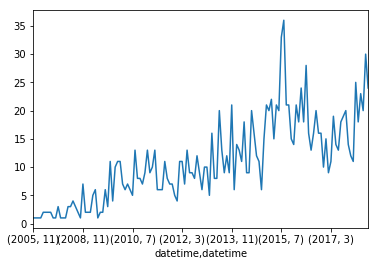

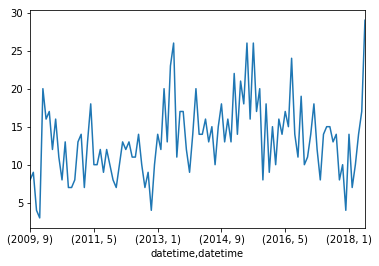

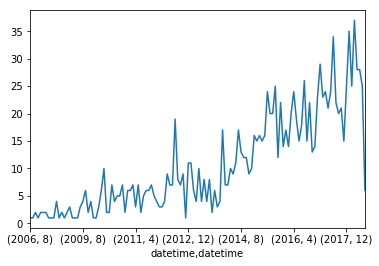

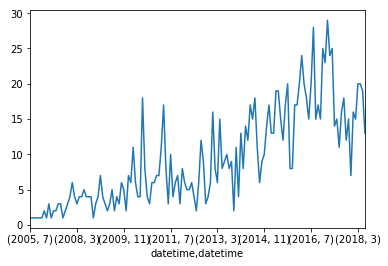

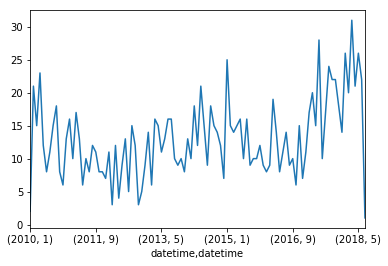

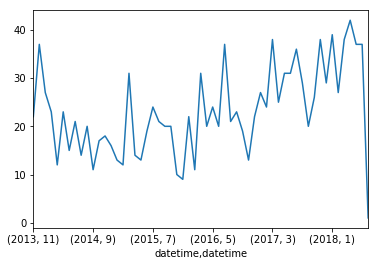

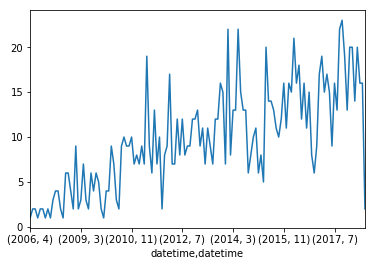

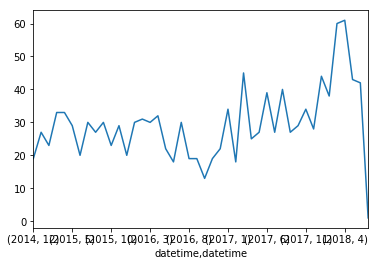

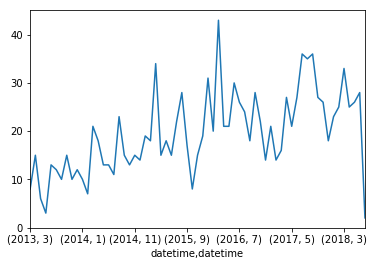

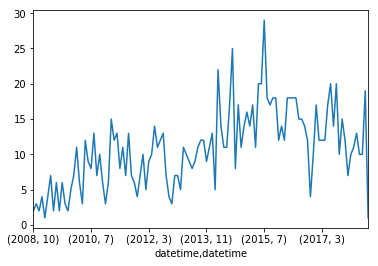

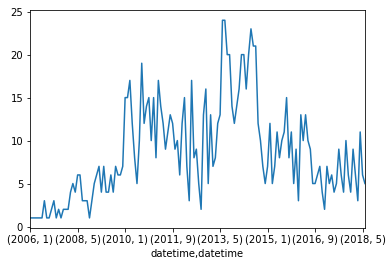

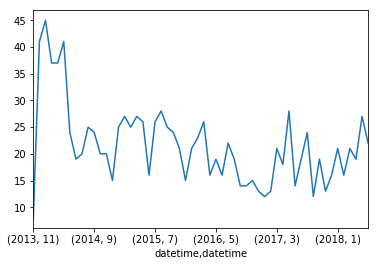

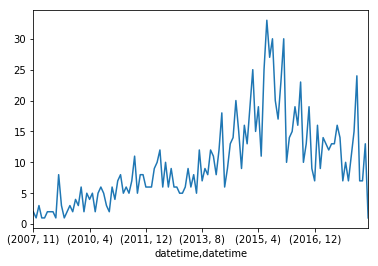

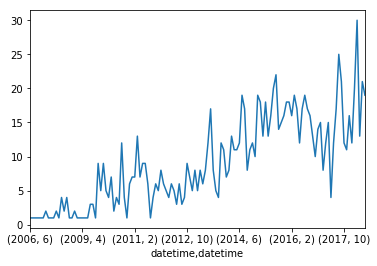

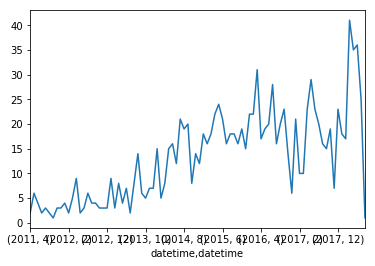

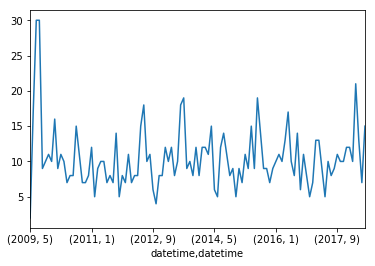

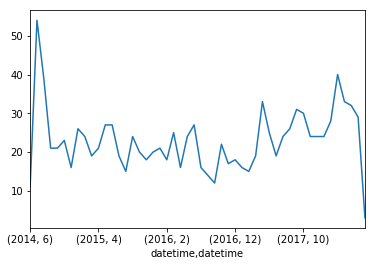

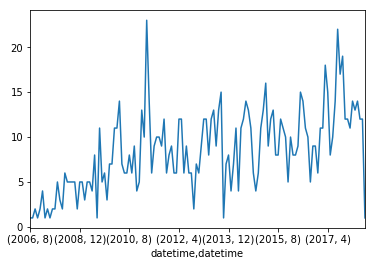

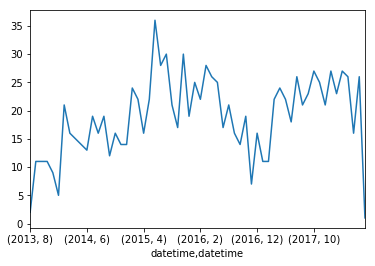

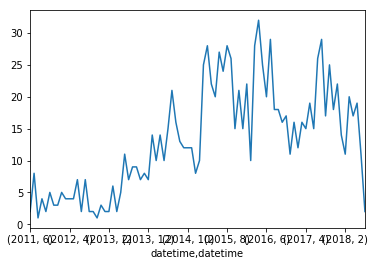

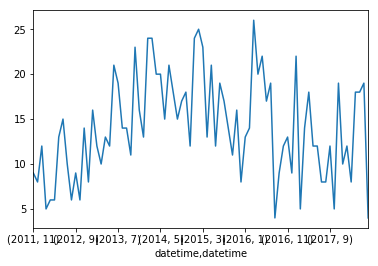

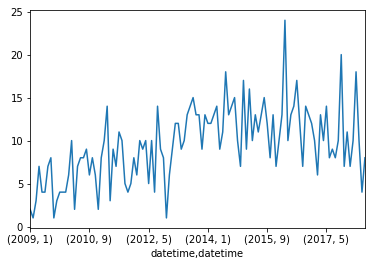

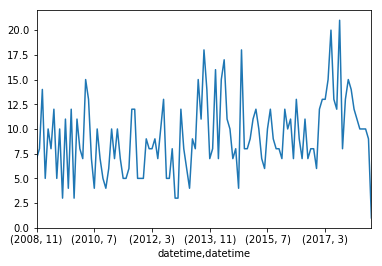

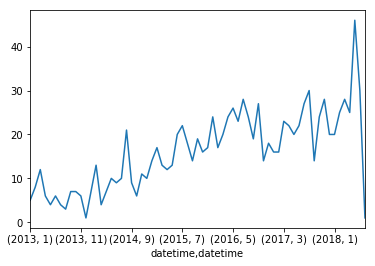

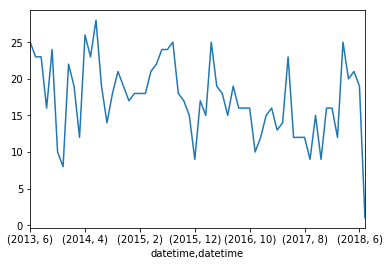

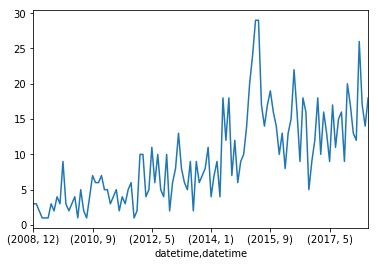

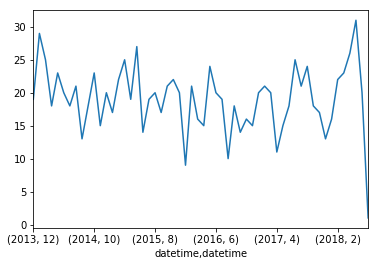

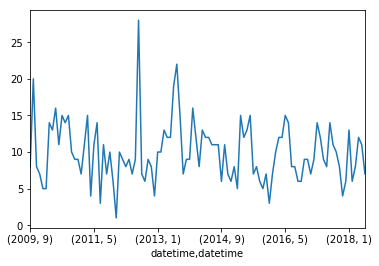

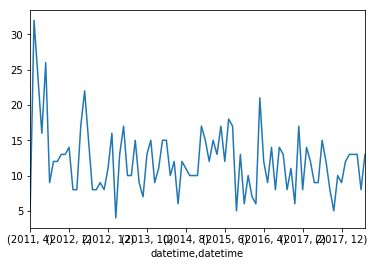

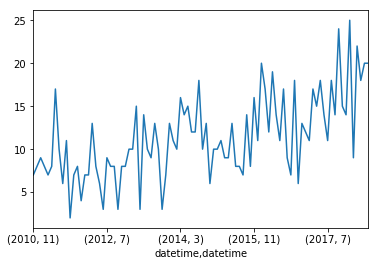

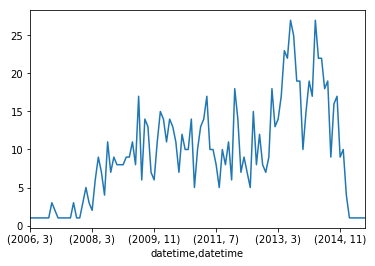

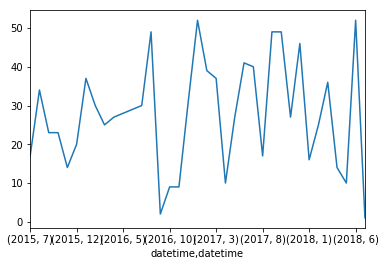

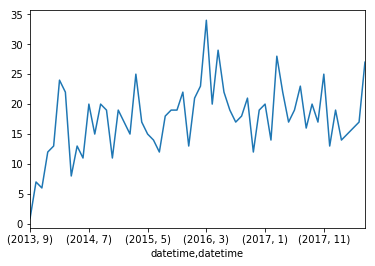

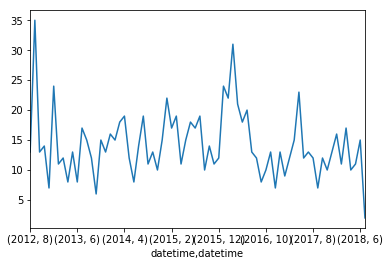

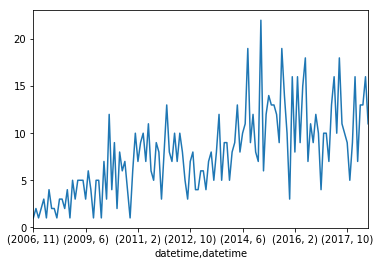

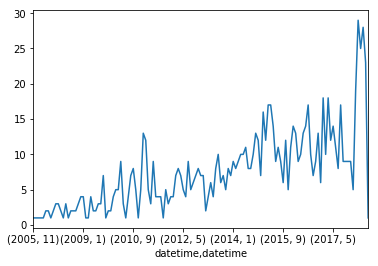

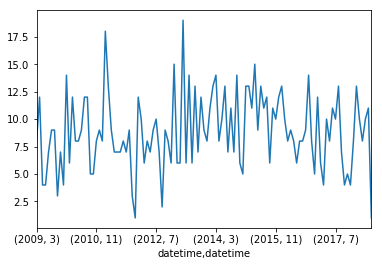

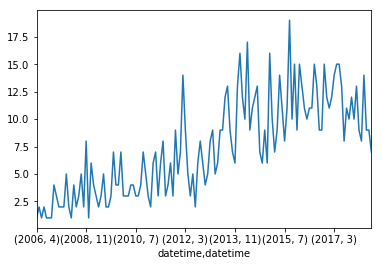

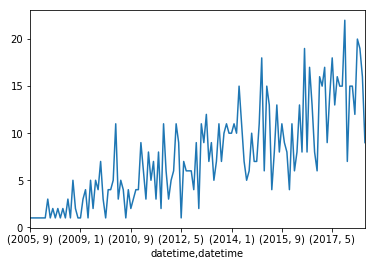

In [54]:
business_groups = AZ_reviews.groupby('business_id')
sorted_groups = business_groups.size().sort_values(ascending=False)
for business_id, size in (sorted_groups.items()):
    if size>1000:
        plot_by_month(AZ_reviews, business_id)